<br><p style="margin-left: 25%; font-size:20px;">Machine Learning Camp: HomeWork 7 Section 1</p><br>

## 1. **Extracting twitter data:** In this problem we would like to extract data from twitter.

a. **Twitter API:** Set up twitter API using any of the methods as mentioned in the class.

In [2]:
# TODO

b. Now search twitter messages for "data science job". Display few job informations.

In [3]:
# TODO

c. Search 300 tweets using the hash tag `#chess` and save them in an object called `rTweets`. Show the top 7 sources of tweets (such as android or iphone) in a ordered bar plot.

In [4]:
# TODO

d. Convert rTweets into a data frame and store it in an object called dTweets. Display some data from dTweets.

In [5]:
# TODO 

e. dTweets has a column showing the time the tweet was created. Generate a plot showing number of tweets on each of the hours.

In [6]:
# TODO

f. Arrange the dataframe dTweets based on the retweetCount. While doing this select only columns text, screenName, retweetCount. Store the data in a object called mostTweets. Display five texts that are most retweeted.

In [8]:
# TODO

g. Generate a bar chart showing top 15 screen names and count of retweets from mostTweets. Order the bars based on the retweet counts.

In [9]:
# TODO

## 2. **Working with databases:** Please follow the instruction below before answering the questions:
* Import the sqlite3
* Connect to titanic.db

In [1]:
import sqlite3 as sql
import pandas as pd

In [2]:
conn = sql.connect("titanic(2).db")
curs = conn.cursor()
curs.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(curs.fetchall())

[('titanic',)]


In [3]:
query = "SELECT * FROM titanic"
df = pd.read_sql_query(query, conn)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Averageage
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,**EMPTY**,S,2,0,30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,2,0,29
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,**EMPTY**,S,1,0,29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,2,0,29
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,**EMPTY**,S,1,0,30


a. What is the average age of passengers who survived? Group the data by Sex. Display only the column `Sex`, `AverageAge`

In [4]:
curs.execute("SELECT AVG(Age) FROM titanic WHERE Survived='1'")
curs.fetchall()

[(28.19329861111111,)]

In [5]:
curs.execute("SELECT AVG(Age) FROM titanic WHERE Survived='0'")
curs.fetchall()

[(30.62617924528302,)]

In [ ]:
# TODO
curs.execute("ALTER TABLE titanic ADD COLUMN Averageage")
curs.fetchall()

In [7]:
curs.execute("UPDATE titanic SET Averageage = 29 WHERE Survived LIKE '1'")
conn.commit()


In [38]:
curs.execute("UPDATE titanic SET Averageage = 30 WHERE Survived LIKE '0'")
conn.commit()

In [43]:
curs.execute("SELECT Sex, Averageage FROM titanic GROUP BY Sex")
conn.commit()
curs.fetchall()

[('female', 29), ('male', 30)]

b. What is the percentage of passengers who survived in each Passenger Class or `Pclass`? Group the data by `Sex`. Display Pclass, Sex, percentage value. 

In [55]:
# TODO
curs.execute("SELECT Pclass,Sex, AVG(Survived)*100 FROM titanic GROUP BY Pclass, Sex ")
curs.fetchall()

[('1', 'female', 96.73913043478261),
 ('1', 'male', 36.885245901639344),
 ('2', 'female', 92.10526315789474),
 ('2', 'male', 15.74074074074074),
 ('3', 'female', 50.0),
 ('3', 'male', 13.544668587896252)]

c. What is the average age of all the passenger (survived and not survived)? Group the data by `Pclass`, `Sex`, `Survived`. After that use `seaborn` to generate a line plot to show average age vs pclass, facet by sex and color it by survived.

In [52]:
# TODO
curs.execute("SELECT AVG(Age) FROM titanic")
curs.fetchall()

[(29.64209269662921,)]

In [75]:
curs.execute("SELECT Pclass,Sex,Survived, AVG(Age) FROM titanic GROUP BY Survived,Pclass, Sex ")
line=curs.fetchall()
line

[('1', 'female', '0', 25.666666666666668),
 ('1', 'male', '0', 44.58196721311475),
 ('2', 'female', '0', 36.0),
 ('2', 'male', '0', 33.36904761904762),
 ('3', 'female', '0', 23.818181818181817),
 ('3', 'male', '0', 27.25581395348837),
 ('1', 'female', '1', 34.5625),
 ('1', 'male', '1', 36.248000000000005),
 ('2', 'female', '1', 28.080882352941178),
 ('2', 'male', '1', 16.022),
 ('3', 'female', '1', 19.329787234042552),
 ('3', 'male', '1', 22.274210526315787)]

In [85]:
my_data = line
new_my_data = [[Pclass, sex, survived, aveage] for (Pclass, sex, survived, aveage) in my_data]
df = pd.DataFrame(new_my_data, columns=['Pclass', 'sex','survived', 'aveage'])
df

,Pclass,sex,survived,aveage
0,1,female,0,25.666667
1,1,male,0,44.581967
2,2,female,0,36.000000
3,2,male,0,33.369048
4,3,female,0,23.818182
5,3,male,0,27.255814
6,1,female,1,34.562500
7,1,male,1,36.248000
8,2,female,1,28.080882
9,2,male,1,16.022000


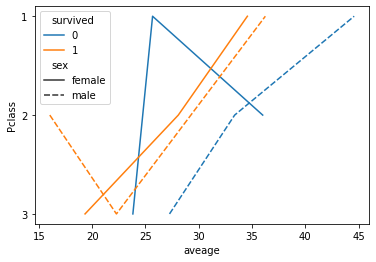

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x="aveage", y="Pclass",
             hue="survived", style="sex",
             data=df)
  
plt.show()

d. What is the name, age, sex and pclass of the 5 oldest and 5 youngest persons who died?

In [71]:
# TODO
curs.execute("SELECT Name,Pclass,Sex,Survived, MIN(Age) FROM titanic GROUP BY Survived,Pclass, Sex ")
curs.fetchmany(5)

[('Allison, Miss. Helen Loraine', '1', 'female', '0', '2'),
 ('Penasco y Castellana, Mr. Victor de Satode', '1', 'male', '0', '18'),
 ('Yrois, Miss. Henriette ("Mrs Harbeck")', '2', 'female', '0', '24'),
 ('Gaskell, Mr. Alfred', '2', 'male', '0', '16'),
 ('Van Impe, Miss. Catharina', '3', 'female', '0', '10')]

In [72]:
curs.execute("SELECT Name,Pclass,Sex,Survived, Max(Age) FROM titanic GROUP BY Survived,Pclass, Sex ")
curs.fetchmany(5)

[('Isham, Miss. Ann Elizabeth', '1', 'female', '0', '50'),
 ('Goldschmidt, Mr. George B', '1', 'male', '0', '71'),
 ('Mack, Mrs. (Mary)', '2', 'female', '0', '57'),
 ('Mitchell, Mr. Henry Michael', '2', 'male', '0', '70'),
 ('Ford, Miss. Robina Maggie "Ruby"', '3', 'female', '0', '9')]

e. On average which Passenger Class is more expensive?

In [74]:
# TODO
curs.execute("SELECT Pclass ,AVG(Fare) FROM titanic GROUP BY Pclass ")
curs.fetchall()


[('1', 84.19351635514012), ('2', 20.66218315217391), ('3', 13.675550101832997)]